# Demo for Lecture 7
- Linear Perceptron
- SVM

In [12]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_classification
import matplotlib.animation as animation
from IPython.display import HTML

## Perceptron Convergence Demo
This algorithm is simple and provides a great intuition for how to use your data to find a great linear binary classifier. The perceptron algorithm is an __iterative__ algorithm. This means that we will constantly update our classifer __w__ until it performs well on our training data. Intuitively, we want use the points that our incorrectly classifies to help develop a better classifer. Lets see how our model improves across iterations:

In [19]:
# Define a Perceptron class with a single-step update and convergence check
class My_Perceptron:
  def __init__(self, input_dim):
    self.weights = np.zeros(input_dim + 1)  # Initialize weights with an extra for bias term
    self.converged = False  # Track convergence status

  def predict(self, X):
    # Add bias term to each sample
    X_bias = np.c_[np.ones(X.shape[0]), X]
    return np.sign(np.dot(X_bias, self.weights))  # Predict using the sign of weighted sum
  
  def update_weights(self, X, y, learning_rate=1.0):
    # Update weights using a single misclassified sample, if found
    X_bias = np.c_[np.ones(X.shape[0]), X]
    for i in range(len(y)):
      if y[i] * np.dot(X_bias[i], self.weights) <= 0:  # Misclassified point
        self.weights += learning_rate * y[i] * X_bias[i]
        #print(f"Updated weights: {self.weights}")
        return  # Only perform one update
  
  def check_convergence(self, X, y):
    X_bias = np.c_[np.ones(X.shape[0]), X]
    predictions = np.sign(np.dot(X_bias, self.weights))
    self.converged = np.array_equal(predictions, y)  # Check if all predictions are correct
    return self.converged

In [20]:
# Function to plot data and decision boundary
def plot_decision_boundary(X, y, perceptron, title):
  plt.figure(figsize=(8, 6))
  fig, ax = plt.subplots()
  ax.set_xlim(0, 10)
  ax.set_ylim(0, 10)

# Initialize a scatter plot
  scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=50)
  #plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
  
  # Plot decision boundary: w0 + w1*x + w2*y = 0 => y = -(w0 + w1*x) / w2
  x_values = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 200)
  if perceptron.weights[2] != 0:  # Avoid division by zero
      y_values = -(perceptron.weights[0] + perceptron.weights[1] * x_values) / perceptron.weights[2]
      plt.plot(x_values, y_values, color="black", label="Decision Boundary")
  
  plt.xlim([min(X[:, 0]) - 1, max(X[:, 0]) + 1])
  plt.ylim([min(X[:, 1]) - 1, max(X[:, 1]) + 1])
  plt.title(title)
  plt.legend()
  plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


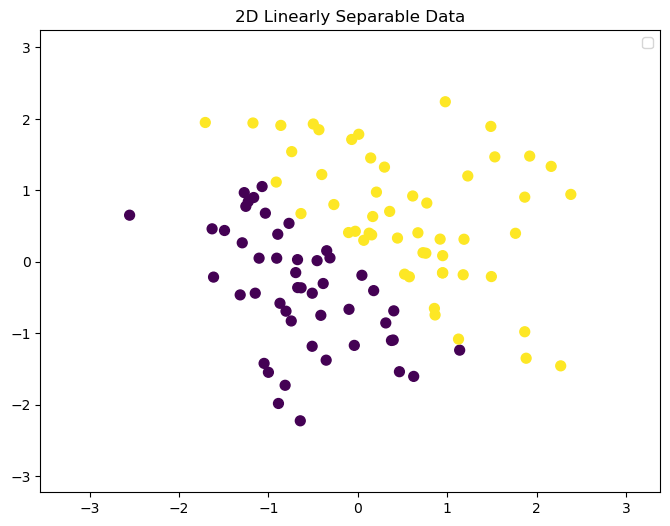

In [10]:
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.where(X[:, 0] + X[:, 1] > 0, 1, -1)  # Linearly separable labels

perceptron = My_Perceptron(input_dim=2)
plot_decision_boundary(X, y, perceptron, "2D Linearly Separable Data")

In [22]:
# Create the Perceptron and initial figure setup
perceptron = My_Perceptron(input_dim=2)
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], c=y, s=100)

# Initial decision boundary line
line, = ax.plot([], [], color='black', linewidth=2)

ax.set_title("Convergence of Linear Perceptron")
ax.set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
ax.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

# Function to initialize the animation
def init():
  line.set_data([], [])
  return line,

# Function to update the decision boundary line for each frame
def update(frame):
  if perceptron.check_convergence(X, y):
      return line,  # Stop updating if converged

  # Update weights and decision boundary
  perceptron.update_weights(X, y)
  
  # Calculate decision boundary: w0 + w1*x + w2*y = 0 -> y = -(w0 + w1*x) / w2
  x_values = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200)
  if perceptron.weights[2] != 0:  # Avoid division by zero
      y_values = -(perceptron.weights[0] + perceptron.weights[1] * x_values) / perceptron.weights[2]
      line.set_data(x_values, y_values)
  
  return line,

# Create the animation
ani = animation.FuncAnimation(
    fig, update, init_func=init, frames=50, interval=500, blit=True, repeat=False
)

plt.close(fig)
# Display the animation
HTML(ani.to_jshtml())

Slowly but surely our classifier gets better until it converges! The intuition behind the perceptron is that we use the incorrectly classified points to change __w__ in order to make better guesses.

## SVM Demo

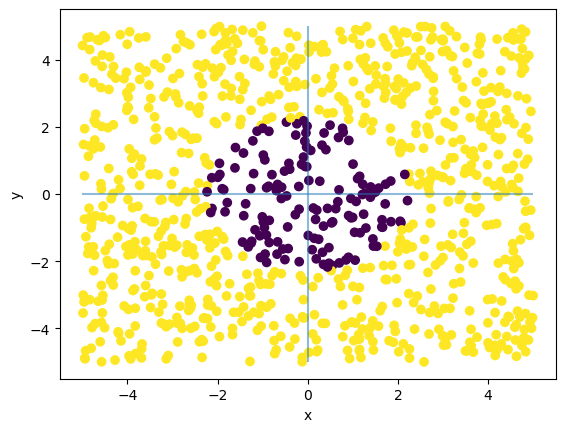

In [23]:
data = []
# randomly generate circular data
for i in range(0,1000):
    point = [np.random.uniform(-5,5),np.random.uniform(-5,5)]
    if point[0]**2 + point[1]**2 < 5:
        point.append(0)
    else:
        point.append(1)
    data.append(point)

data = np.asarray(data)
plt.scatter(data[:,0],data[:,1],c=data[:,2])
plt.xlabel('x'); plt.ylabel('y')
plt.vlines(0,-5,5,alpha=0.5); plt.hlines(0,-5,5,alpha=0.5)
plt.show()

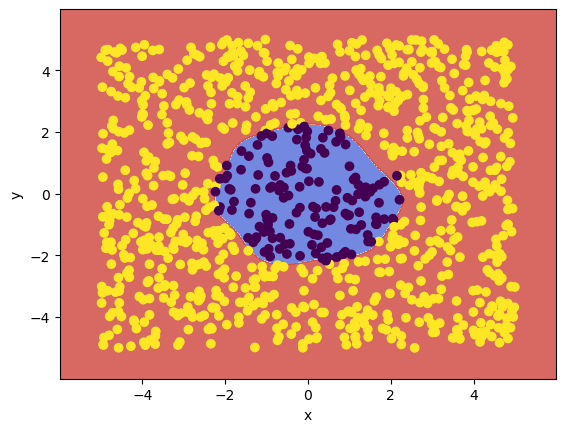

In [24]:
X = data[:,:-1]
y = data[:,-1]
h = .02
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)
# use radial kernal: rbf
classifier = SVC(kernel = 'rbf', gamma = 1)
classifier.fit(X_train, y_train)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(data[:,0],data[:,1],c=data[:,2])
plt.xlabel('x'); plt.ylabel('y')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

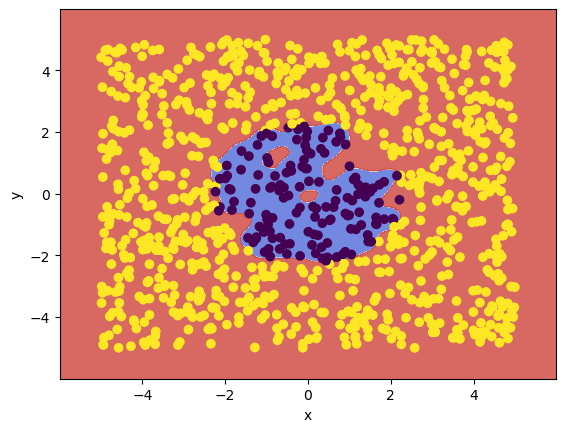

In [25]:
# Change gamma
X = data[:,:-1]
y = data[:,-1]
h = .02
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)
classifier = SVC(kernel = 'rbf', gamma = 7)
classifier.fit(X_train, y_train)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(data[:,0],data[:,1],c=data[:,2])
plt.xlabel('x'); plt.ylabel('y')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html - understand gammas better

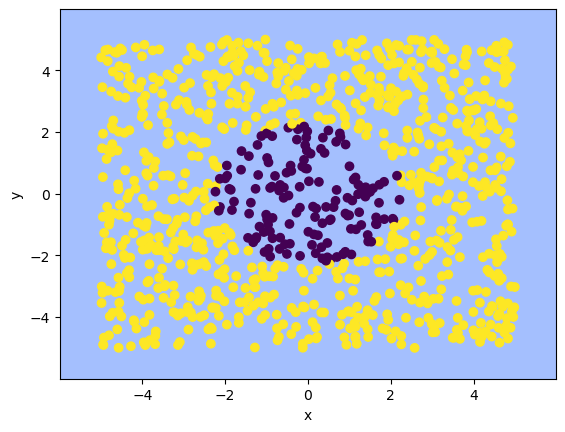

In [26]:
classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(data[:,0],data[:,1],c=data[:,2])
plt.xlabel('x'); plt.ylabel('y')
plt.show()

https://chrisalbon.com/code/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/ Nice blog post with effect of C and gamma on a different dataset